## Специализированные программные библиотеки для анализа данных.

### Медведев Вальдемар Сергеевич 20214


In [1]:
import os

### Импортируем необходимые модули 

In [2]:
import numpy as np
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#sns.set()
# с помощью этой строки мы можем включать в этот документ графики:
%matplotlib inline 

### Ваши наборы данных - это разминочный датасет с ирисами и сводка по эпидемиологической обстановке в России с прошлого занятия. В этом домашнем задании 5 пунктов, постарайтесь выполнить их все. Всего за эту домашку можно получить 8 баллов.

### 1. Базовые знания о данных (1 балл)

У вас есть датасет с данными об ирисах. Посмотрите на ваши данные, выведите статистику для них. Изобразите на графике распределение значений параметров вашего набора.

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

## Загрузите игрушечный набор -- ирисы
iris = load_iris()
X = iris.data
y = iris.target
## создадим датафрейм
X = pd.DataFrame(iris.data.T, index = iris.feature_names).T
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


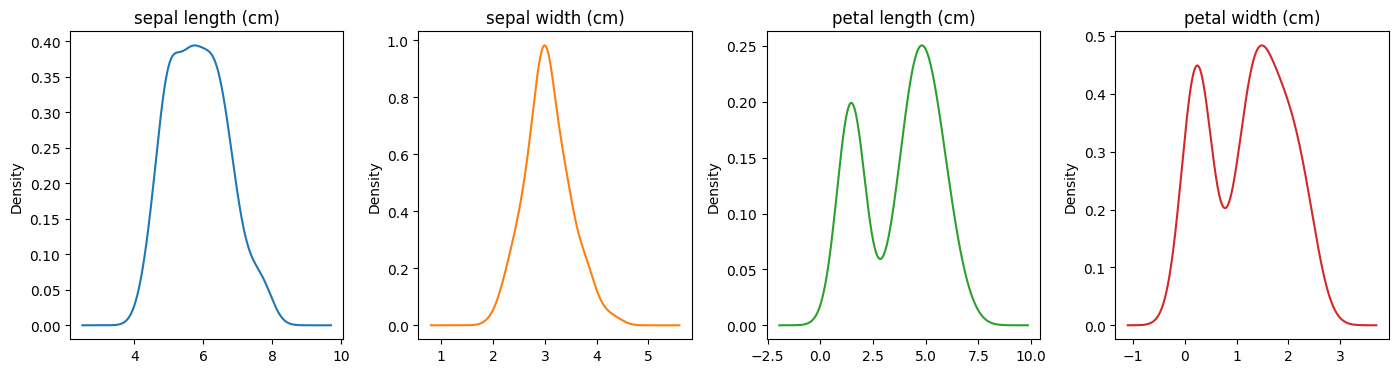

In [4]:
# YOUR CODE HERE
_ = X.plot(kind='kde', subplots=True, layout=(4,4), sharex=False, 
                         sharey=False, figsize=[14,14], legend = False,
                         title = X.columns.values.tolist())
plt.tight_layout()

### 2. Визуализация результатов PCA (2 балла)

Проведите PCA анализ для ваших данных.
1. Постройте диаграмму рассеяния в координатах PC1, PC2. Цвет точек должен соответствовать целевой переменной y, где её значения - один из 3 видов ирисов. *(1 балл)*
2. Постройте биплот, отражающий влияние исходных параметров на PC1 и PC2. *(1 балл)*

In [5]:
X.insert(0, "type", y)
Y = X['type']
Y = Y.apply(lambda x: f'type{x}')
X = X.drop('type', axis=1, inplace=False)

In [6]:
Xsc = StandardScaler().fit_transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=X.index, columns=X.columns)


In [7]:
mean_vec = np.mean(Xsc.values, axis=0)
cov_mat = (Xsc - mean_vec).T.dot((Xsc - mean_vec)) / (Xsc.shape[0] - 1) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [8]:
skpcamod = PCA().fit(X = Xsc) ## построим PCA модель с помощью sklearn
skpcamod.explained_variance_ 

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
ixs = np.argsort(eig_vals)[::-1]

In [12]:
u,s,v = np.linalg.svd(cov_mat) ## SVD, u,s,v - левые сингулярные вектора, сингулярные значения, правые сингулярные вектора
u.shape, s.shape, v.shape

((4, 4), (4,), (4, 4))

Text(0.5, 1.0, 'With sklearn PCA')

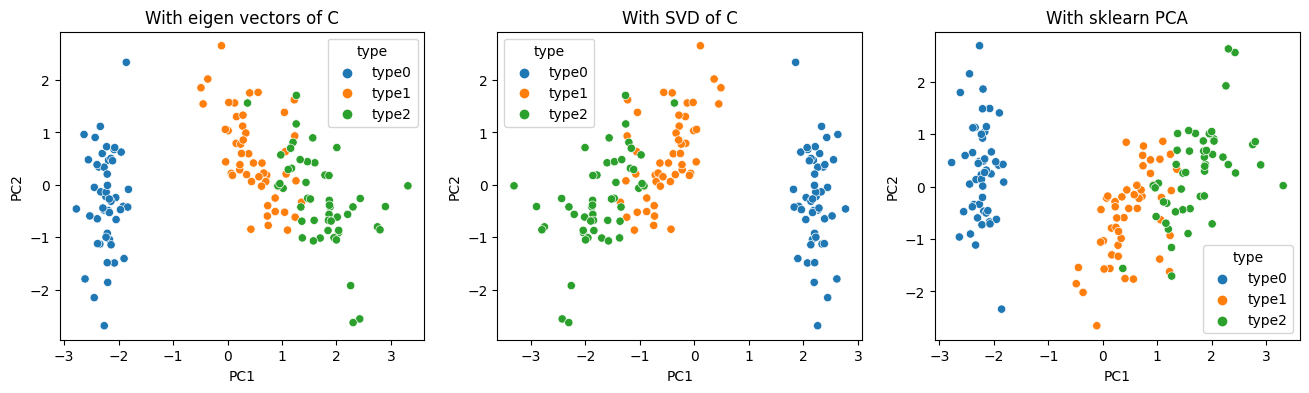

In [13]:
# YOUR CODE HERE
scores_eig = pd.DataFrame(Xsc @ eig_vecs[:,ixs][:,:2]) # трансформируем исходную матрицу данных X в матрицу счетов PC1-2
scores_svd = pd.DataFrame(Xsc @ u[:,:2]) # трансформируем исходную матрицу данных X в матрицу счетов PC1-2
scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:,:2]) # с помощью sklearn
scores_svd.columns = ['PC1','PC2']
scores_eig.columns = ['PC1','PC2']
scores_skl.columns = ['PC1','PC2']

_ , axes = plt.subplots(ncols=3, nrows=1, figsize = (16, 4))
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_eig, hue = Y, ax = axes[0])
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_svd, hue = Y, ax = axes[1])
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_skl, hue = Y, ax = axes[2])
axes[0].set_title('With eigen vectors of C')
axes[1].set_title('With SVD of C')
axes[2].set_title('With sklearn PCA')




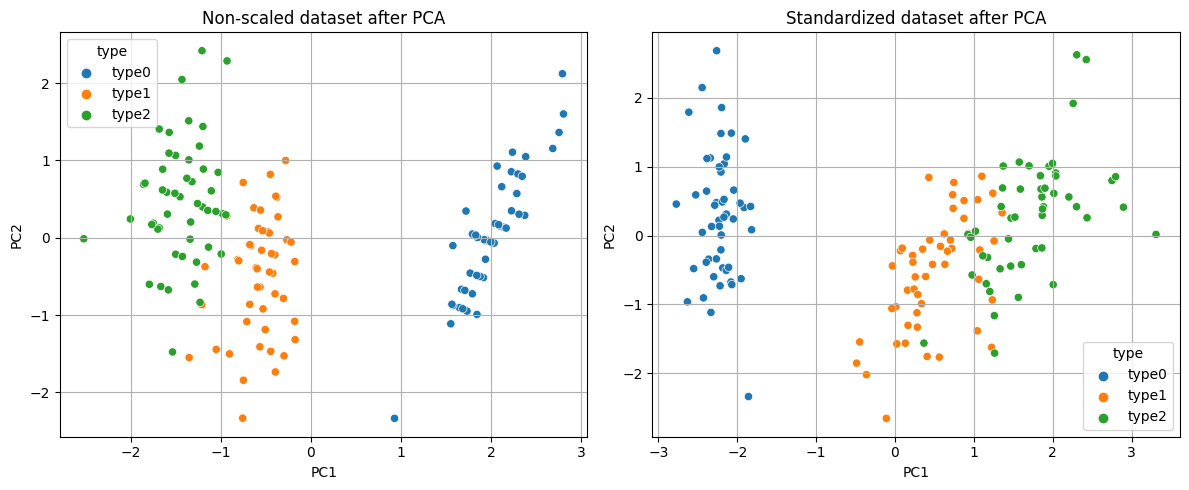

In [25]:
#X = Xsc.iloc[:, 1:].astype('float64') # убираем метки классов из наших данных

sklearn_pca = PCA(n_components=3) # инициализируем объект класса PCA и говорим ему оставить 2 ГК
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(Xsc), # проводим МГК стандартизованных данных
                              columns = ['PC1','PC2','PC3'])

sklearn_pca_unsc = PCA(n_components=3) # еще один объект класса PCA
sklearn_transf_unsc = pd.DataFrame(sklearn_pca_unsc.fit_transform(X), # проводим МГК нешкалированных данных
                                   columns = ['PC1','PC2','PC3'])
# а теперь посмотрим на результаты PCA
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf_unsc, hue = Y, ax = ax1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf, hue = Y, ax = ax2)

ax1.set_title('Non-scaled dataset after PCA')
ax2.set_title('Standardized dataset after PCA')
ax1.grid()
ax2.grid()

plt.tight_layout()

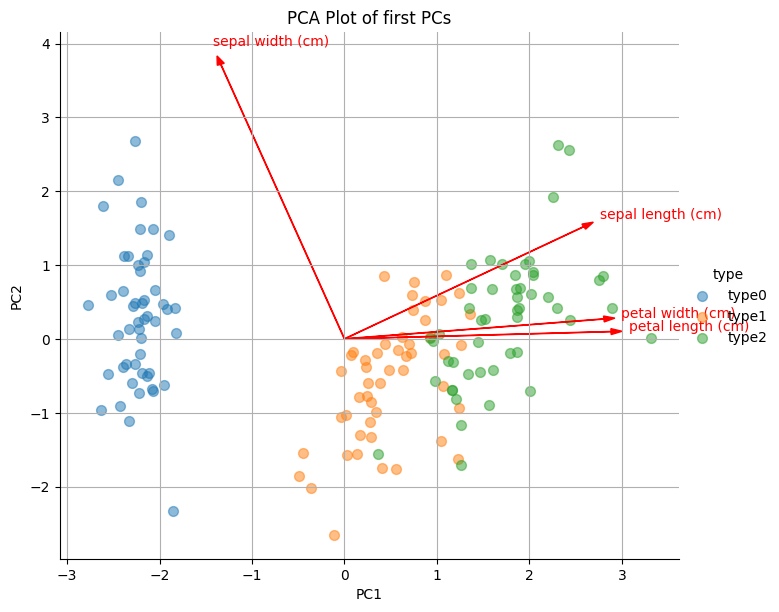

In [31]:
## https://thehongwudotcom.wordpress.com/2016/02/28/biplot-in-python-optimized-with-color-scatter-plot/
## с изменениями
df_pca = pd.DataFrame(sklearn_transf)
df_pca = pd.concat([Y, df_pca], axis = 1)
df_pca.columns = ['type','PC1', 'PC2','PC3' ]

sns.lmplot(x = 'PC1', y = 'PC2', data=df_pca, fit_reg = False, 
           hue = 'type', height = 6, aspect = 7/6, scatter_kws={"s": 50, 'alpha':0.5})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = sklearn_pca.components_[0]
yvector = sklearn_pca.components_[1]
 
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*df_pca.PC1.max()*1.5, yvector[i]*df_pca.PC2.max()*1.5,
              color='r', width=0.005, head_width=0.08)
    plt.text(xvector[i]*df_pca.PC1.max()*1.6, yvector[i]*df_pca.PC2.max()*1.6,
             list(Xsc.columns.values)[i], color='r')
    
#for i in range(len(xs)):
#    plt.text(xs[i]*1.08, ys[i]*1.08, list(X.index)[i], color='b') # index number of each observations
plt.grid()
_ = plt.title('PCA Plot of first PCs')

##### Набор данных -- уже не столь свежая сводка по эпидемиологической обстановке в России
### 3. Аккумулирование информации по неделям (2 балла)

Для выполнения этого задания вам придется вернуться к датасету ncov_ru_j, с которым вы работали в прошлом домашнем задании.

Определите прирост числа заражений в процентах за неделю (как вы это сделаете - вопрос), если не получится - просто постройте график для среднего числа активных случаев на 100 тыс. населения со скользящим окном в 7 дней.
Пример, как посчитать, был на предыдущих занятиях - ближе к концу в ноутбуке №2.
График постройте для следующих регионов:

`
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.', 
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']
`

Hа самом деле, смысла в выборе именно этих регионов нет - можете выбрать другие, какие вам нравятся (просто если мы сразу отрисуем все регионы на одном графике, он получится нечитаемым).

In [32]:
ncov_ru_de = pd.read_csv('./Вальдемар Сергеевич Медведев - COVID_RU_Ya_descr.csv')
ncov_ru_stat = pd.read_csv('./Вальдемар Сергеевич Медведев - COVID_RU_Ya_stat_2022.csv')

In [33]:
ncov_ru_j = ncov_ru_de.merge(ncov_ru_stat, on='Регион')

In [34]:
ncov_ru_j.loc[:, 'Дата'] = ncov_ru_j['Дата'].astype('datetime64')


/tmp/ipykernel_5177/934371819.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ncov_ru_j.loc[:, 'Дата'] = ncov_ru_j['Дата'].astype('datetime64')
/tmp/ipykernel_5177/934371819.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ncov_ru_j.loc[:, 'Дата'] = ncov_ru_j['Дата'].astype('datetime64')


In [35]:
ncov_ru_j.set_index(['Регион','Дата'], inplace = True)
df = ncov_ru_j.sort_index()

In [38]:
df = df.assign(Активных = df.Заражений - df.Выздоровлений - df.Смертей)
df = df.assign(Активных_на_100к = (df.Заражений - df.Выздоровлений - df.Смертей)/100000)
df = df.assign(Заражений_на_100_к = df.Заражений / 100000)
df = df.assign(Смертей_на_100_к = df.Смертей / 100000)
df = df.assign(Заражений_за_день_на_100_к = df['Заражений за день'] / 100000)
df = df.assign(Смертей_за_день_на_100к = df['Смертей за день'] / 100000)


In [37]:
#ncov_ru_j = # вставьте код генерации с прошлого домашнего задания
## либо, вы можете прочитать таблицу, но тогда приложите ее к этому домашнему заданию

## В вашей таблице должны быть колонки:
## "Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'
## "Активных на 100К населения"
## "Заражений на 100К населения"
## "Смертей на 100К населения"
## "Заражений за день на 100К населения"
## "Смертей за день на 100К населения"

## Проверьте, что колонка "Дата" относится к типу "datetime64", если нет -- преобразуйте
## В качестве индексов используйте колонки "Регион" и "Дата" 

In [ ]:
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.', 
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']

In [ ]:
# YOUR CODE HERE

### 4. Динамика прироста числа заражений (2 балла)

1. Постройте график изменения прироста числа заражений начиная с сентября 2021 года с помощью sns.lineplot(). Что произойдёт, если вы не введёте hue? Постройте и такой график. *(1 балл)*
2. Выведите оба графика в одной фигуре - в plt.subplots нужно указать число строк с помощью параметра nrows, однако, убедитесь, что получившийся график будет читаемым и различимым. *(1 балл, можно вывести сразу оба графика в plt.subplots, тогда за всё 2 балла)*

In [ ]:
## создаете figure и axes, задаете размер фигуры и разрешение: 
fig, ax = plt.subplots(figsize = [6, 2.5], dpi = 300) ## например так
sns.lineplot( x = 'Дата', y = '<Ваша колонка>', 
              data = <ваши данные>,
              hue = 'Регион',
              ax = ax )
ax.set_title('Заражений за день на 100 тыс. населения')
ax.grid(ls =':')
## Если вы считаете, что данные лучше смотреть в логарифмической шкале, можете раскомментировать код, приведенный ниже
#ax.set_xscale('log', base=10);
#ax.set_yscale('log', base=10);
## Помним про необходимость установить временные границы
ax.set_xlim([pd.to_datetime('здесь что-то должно быть...'), <тут тоже должна быть дата> ]);
plt.tight_layout()

### 5. Интерактивные графики (1 балл)

Постройте график №1 из предыдущей клетки с помощью bokeh, holoviews или plotly. Пример с holoviews есть в ноутбуке №3 - про траты на здравоохранение по странам по данным ВОЗ

In [ ]:
# import bokeh # библиотека для построения интерактивных графиков
# !pip install holoviews ## -- если вам нужна эта библиотека -- установите ее
# import holoviews as hv # импортируем holoviews
# from bokeh.io import output_notebook
# from bokeh.resources import INLINE
# import holoviews.plotting.bokeh
# output_notebook(resources=INLINE)
# os.environ['HV_DOC_HTML'] = 'true'

Домашнее задание сдаем в виде ноутбука *.ipynb -- можно расшарить ноутбук в Colab'е.  
Обязательно указываем ФИО  
Вопросы категорически приветствуются.